# Logistic Regression (The Implementation)

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Loading Training Data

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/Guhan-B/The-Machine-Learning-Repository/refs/heads/main/datasets/university_acceptance.csv")

X_train = data[["Exam Score 1", "Exam Score 2"]].values
y_train = data["Acceptance"].values

print ('The shape of X_train is:', X_train.shape)
print ('The shape of y_train is: ', y_train.shape)

The shape of X_train is: (100, 2)
The shape of y_train is:  (100,)


### Visulizing Training Data

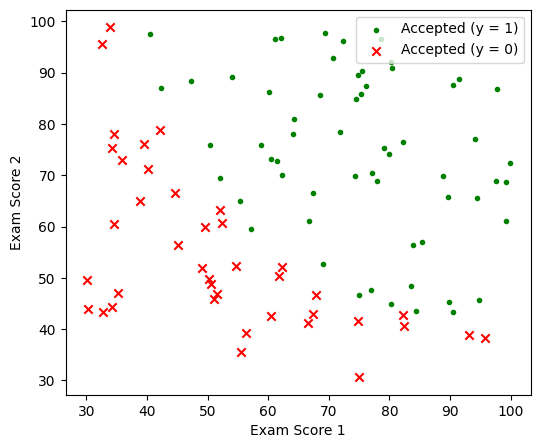

In [3]:
positive = y_train == 1
negative = y_train == 0

plt.figure(figsize=(6, 5))

plt.scatter(X_train[positive, 0], X_train[positive, 1], c='g', marker='.', label="Accepted (y = 1)")
plt.scatter(X_train[negative, 0], X_train[negative, 1], c='r', marker='x', label="Accepted (y = 0)")

plt.xlabel("Exam Score 1")
plt.ylabel("Exam Score 2")

plt.legend(loc='upper right')

plt.show()

#### Defining Model Implementation

In [4]:
class LogisticRegression:
    def __init__(self, max_iter=500, learning_rate=0.01, tol=1e-5, regularization=None, alpha=1.0, beta=0.5):
        # Trainable Parameters
        self.coef = None
        self.intercept = None
        
        # Hyper Parameters
        self.max_iter = max_iter
        self.learning_rate = learning_rate
        self.tol = tol
        self.regularization = regularization
        self.alpha=alpha
        self.beta=beta
        
        # History
        self.history = { "error" : [], "coef" : [], "intercept" : [] }
    
    def fit(self, X, y):
        # Dimensionality of the data
        self.n_samples = X.shape[0]
        self.n_features = X.shape[1]
        
        # Initial values for trainable parameters
        self.coef = np.random.rand(self.n_features)
        self.intercept = np.random.rand()
        
        # The training process (Using gradient descent)
        for i in range(self.max_iter):
            # STEP 1: Making predictions & computer error
            y_pred = LogisticRegression.__sigmoid(np.dot(X, self.coef) + self.intercept)
            error = LogisticRegression.__compute_error(y, y_pred)
            
            # STEP 2: Stopping condition
            if (len(self.history["error"]) > 0 and (self.history["error"][-1] - error) <= self.tol):
                break
            
            # STEP 3: Updating history
            self.history["error"].append(error)
            self.history["coef"].append(self.coef)
            self.history["intercept"].append(self.intercept)
            
            # STEP 4: Computing gradients
            delta_coef, delta_intercept = LogisticRegression.__compute_gradients(
                X, 
                y, 
                y_pred, 
                self.n_samples
            )
            
            # STEP 5: Compute regularization
            reduction = 0
            
            if self.regularization == "L1":
                reduction = self.learning_rate * self.alpha * np.sign(self.coef)
            if self.regularization == "L2":
                reduction = 2.0 * self.learning_rate * self.alpha *  self.coef
            if self.regularization == "ElasticNet":
                reduction = self.learning_rate * self.alpha * ((1.0 - self.beta) * np.sign(self.coef) + self.beta * 2.0 * self.coef)
                
            # STEP 5: Updating trainable parameters
            self.coef = self.coef - self.learning_rate * delta_coef - reduction
            self.intercept = self.intercept - self.learning_rate * delta_intercept             
            
        return self
    
    def predict(self, X):
        return LogisticRegression.__sigmoid(np.dot(X, self.coef) + self.intercept)
    
    def score(self, X, y):
        y_pred = (self.predict(X) >= 0.5).astype(int)
        return np.mean(y_pred == y)
    
    @staticmethod
    def __sigmoid(z):
        return 1 / (1 + np.exp(-z))
    
    # Binary Cross Entropy (or) Log Loss
    @staticmethod
    def __compute_error(y_true, y_pred, epsilon=1e-8):
        '''
        Clipping the value of predicted probability ŷ between 1e-8 and 1 
        because when predicted probability becomes 0 or 1 then log(ŷ) or 
        log(1 - ŷ) is `-inf`. Hence this result in a Runtime Error.
        '''
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    
    @staticmethod
    def __compute_gradients(X, y_true, y_pred, n_samples):
        delta_coef = np.dot(X.T, y_pred - y_true) / n_samples
        delta_intercept = np.mean(y_pred - y_true)
        return delta_coef, delta_intercept

In [5]:
model = LogisticRegression(max_iter=10000, learning_rate=0.01).fit(X_train, y_train)

print('Model coefficients:', model.coef)
print('Model intercept: ', model.intercept)
print('Model error: ', model.score(X_train, y_train))

y_pred = model.predict(X_train)

Model coefficients: [0.72986576 0.53344981]
Model intercept:  0.39663898061539415
Model error:  0.6
